In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score



In [40]:
file_path = '../data/train.csv'
data = pd.read_csv(file_path)

In [41]:

print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


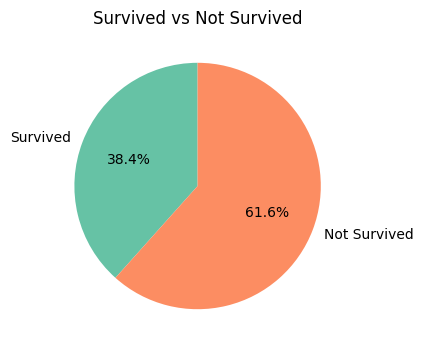

In [42]:

total_passengers = len(data)


total_survived = data['Survived'].sum()


total_non_survived = total_passengers - total_survived


labels = ['Survived', 'Not Survived']
sizes = [total_survived, total_non_survived]
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Survived vs Not Survived')
plt.show()

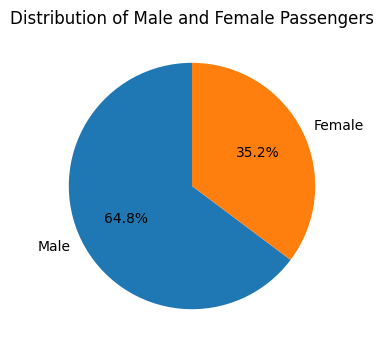

In [43]:
# Calculate the number of male and female passengers
male_count = data[data['Gender'] == 'male'].shape[0]
female_count = data[data['Gender'] == 'female'].shape[0]

# Define labels, sizes, and colors for the pie chart
labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['#1f77b4', '#ff7f0e']

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Male and Female Passengers')
plt.show()

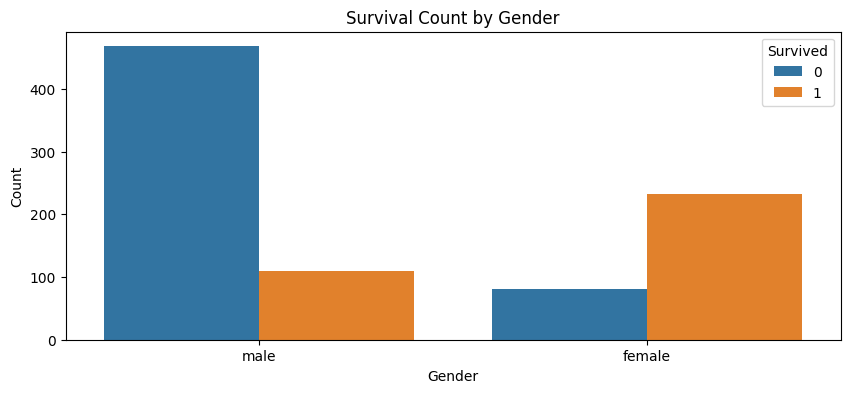

In [44]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Gender', hue='Survived', data=data)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

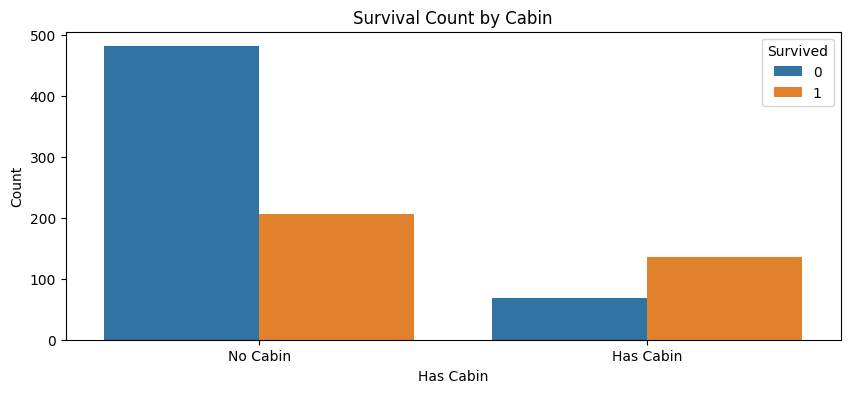

In [45]:
data['HasCabin'] = data['Cabin'].notna().astype(int)
plt.figure(figsize=(10, 4))
sns.countplot(x='HasCabin', hue='Survived', data=data)
plt.title('Survival Count by Cabin')
plt.xlabel('Has Cabin')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Cabin', 'Has Cabin'])
plt.legend(title='Survived', loc='upper right')
plt.show()


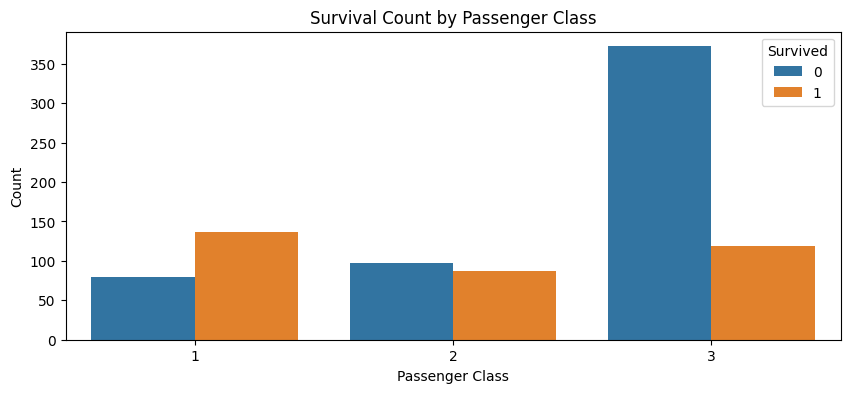

In [46]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()


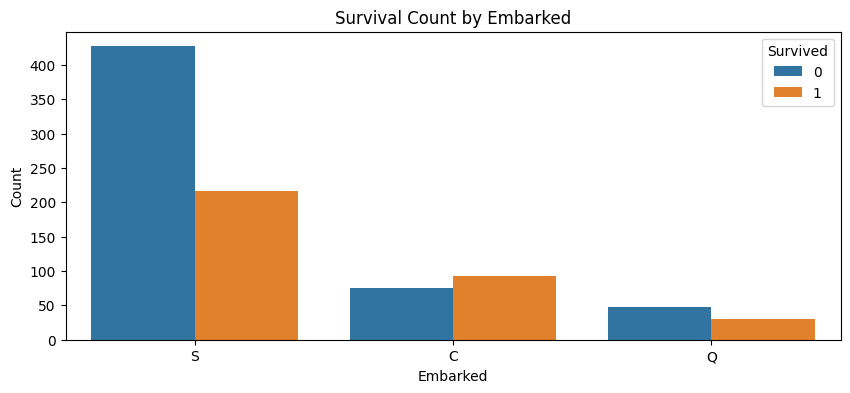

In [47]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

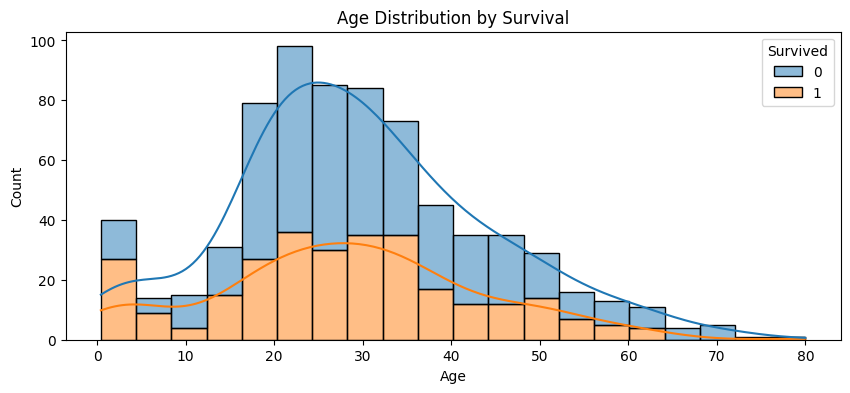

In [48]:
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [49]:


# Drop unnecessary columns
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

print(data.columns)


Index(['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'HasCabin'],
      dtype='object')


In [50]:

print("Before filling missing values:")
print(data.isnull().sum()) 

#handling missing values using ffill
data_filled = data.fillna(method='ffill')


print("\nAfter filling missing values:")
print(data_filled.isnull().sum())  


Before filling missing values:
Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
HasCabin      0
dtype: int64

After filling missing values:
Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
HasCabin    0
dtype: int64


In [51]:

# Encode categorical variables using One-Hot Encoding
data = pd.get_dummies(data, columns=['Gender','Embarked'], drop_first=False)

# Define features and target
X = data.drop(columns=['Survived'])
y = data['Survived'] 


In [52]:
print(data)
print(data.columns)

     Survived  Pclass   Age  SibSp  Parch     Fare  HasCabin  Gender_female  \
0           0       3  22.0      1      0   7.2500         0          False   
1           1       1  38.0      1      0  71.2833         1           True   
2           1       3  26.0      0      0   7.9250         0           True   
3           1       1  35.0      1      0  53.1000         1           True   
4           0       3  35.0      0      0   8.0500         0          False   
..        ...     ...   ...    ...    ...      ...       ...            ...   
886         0       2  27.0      0      0  13.0000         0          False   
887         1       1  19.0      0      0  30.0000         1           True   
888         0       3   NaN      1      2  23.4500         0           True   
889         1       1  26.0      0      0  30.0000         1          False   
890         0       3  32.0      0      0   7.7500         0          False   

     Gender_male  Embarked_C  Embarked_Q  Embarked_

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("total count:",len(X), len(y))
print("train Count:",len(X_train) , len(y_train))
print("test count :",len(X_test) , len(y_test))


total count: 891 891
train Count: 712 712
test count : 179 179


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Original X_train:")
print(X_train)
print("\nScaled X_train:")
print(X_train_scaled)


Original X_train:
     Pclass   Age  SibSp  Parch      Fare  HasCabin  Gender_female  \
331       1  45.5      0      0   28.5000         1          False   
733       2  23.0      0      0   13.0000         0          False   
382       3  32.0      0      0    7.9250         0          False   
704       3  26.0      1      0    7.8542         0          False   
813       3   6.0      4      2   31.2750         0           True   
..      ...   ...    ...    ...       ...       ...            ...   
106       3  21.0      0      0    7.6500         0           True   
270       1   NaN      0      0   31.0000         0          False   
860       3  41.0      2      0   14.1083         0          False   
435       1  14.0      1      2  120.0000         1           True   
102       1  21.0      0      1   77.2875         1          False   

     Gender_male  Embarked_C  Embarked_Q  Embarked_S  
331         True       False       False        True  
733         True       False   

In [55]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_pred = model.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Accuracy: 0.8156
F1 Score: 0.7724
ROC AUC: 0.8069
